In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Data Prep
===

In [2]:
cicero_speeches = pd.read_csv('../data/cicero_data_with_genre.csv')
cicero_speeches = cicero_speeches.loc[cicero_speeches['genre'] == 'speeches']
cicero_speeches = cicero_speeches.drop(columns=['Unnamed: 0', 'genre'])
cicero_speeches.head()

,title,cretic-trochee (-u--x),cretic-trochee 1 res (uuu--x),cretic-trochee 1 res (-uuu-x),cretic-trochee 1 res (-u-uux),double/molossus-cretic pure double-cretic (-u--ux),double/molossus-cretic pure molossus-cretic (----ux),double/molossus-cretic 1 res (uuu--ux),double/molossus-cretic 1 res (-uuu-ux),double/molossus-cretic 1 res (-u-uuux),...,hypodochmiac (-u-ux),hypodochmiac 1 res (uuu-ux),hypodochmiac 1 res (-uuuux),spondaic (---x),heroic (-uu-x),first paeon (-uux),choriamb trochee (-uu--x),short sequence (uuuuux),misc_clausulae,author
8,de domo sua,137,16,51,11,61,35,11,4,1,...,42,2,1,52,13,14,5,1,17,cicero
11,de haruspicum responso,82,8,37,9,26,26,4,2,1,...,12,0,1,41,11,2,2,1,2,cicero
14,de lege agraria,167,12,35,17,58,60,7,3,2,...,52,3,0,71,16,18,5,0,21,cicero
15,de lege agraria 1,23,2,6,4,12,13,2,0,0,...,10,1,0,13,0,1,0,0,5,cicero
16,de lege agraria 2,131,8,26,10,35,38,4,3,2,...,38,1,0,49,15,16,5,0,11,cicero


In [3]:
rows_to_drop = ['in catilinam', 'de lege agraria', 'in verrem', 'philippicae']
cicero_speeches = cicero_speeches.loc[~cicero_speeches['title'].isin(rows_to_drop)]

In [4]:
cicero_speeches.head()

,title,cretic-trochee (-u--x),cretic-trochee 1 res (uuu--x),cretic-trochee 1 res (-uuu-x),cretic-trochee 1 res (-u-uux),double/molossus-cretic pure double-cretic (-u--ux),double/molossus-cretic pure molossus-cretic (----ux),double/molossus-cretic 1 res (uuu--ux),double/molossus-cretic 1 res (-uuu-ux),double/molossus-cretic 1 res (-u-uuux),...,hypodochmiac (-u-ux),hypodochmiac 1 res (uuu-ux),hypodochmiac 1 res (-uuuux),spondaic (---x),heroic (-uu-x),first paeon (-uux),choriamb trochee (-uu--x),short sequence (uuuuux),misc_clausulae,author
8,de domo sua,137,16,51,11,61,35,11,4,1,...,42,2,1,52,13,14,5,1,17,cicero
11,de haruspicum responso,82,8,37,9,26,26,4,2,1,...,12,0,1,41,11,2,2,1,2,cicero
15,de lege agraria 1,23,2,6,4,12,13,2,0,0,...,10,1,0,13,0,1,0,0,5,cicero
16,de lege agraria 2,131,8,26,10,35,38,4,3,2,...,38,1,0,49,15,16,5,0,11,cicero
17,de lege agraria 3,13,2,3,3,11,9,1,0,0,...,4,1,0,9,1,1,0,0,5,cicero


In [5]:
cicero_speeches.to_csv('../data/cicero_speeches_pca.csv')
len(cicero_speeches.columns.values)

28

In [6]:
tacitus_df = pd.read_csv('../data/tacitus_df.csv')

In [7]:
def prep_df(df, author):
    df = df.drop(columns=['total_clausulae', 'total_excluded', 'abbrev_excluded', 'bracket_excluded', 'short_excluded', 'total_artistic', 'percent_clausulae'])
    df['author'] = author
    return df

In [8]:
tacitus_df = prep_df(tacitus_df, 'tacitus')

In [9]:
tacitus_df.head()

,title,cretic-trochee (-u--x),cretic-trochee 1 res (uuu--x),cretic-trochee 1 res (-uuu-x),cretic-trochee 1 res (-u-uux),double/molossus-cretic pure double-cretic (-u--ux),double/molossus-cretic pure molossus-cretic (----ux),double/molossus-cretic 1 res (uuu--ux),double/molossus-cretic 1 res (-uuu-ux),double/molossus-cretic 1 res (-u-uuux),...,hypodochmiac (-u-ux),hypodochmiac 1 res (uuu-ux),hypodochmiac 1 res (-uuuux),spondaic (---x),heroic (-uu-x),first paeon (-uux),choriamb trochee (-uu--x),short sequence (uuuuux),misc_clausulae,author
0,agricola,45.0,2.0,9.0,13.0,24.0,15.0,2.0,1.0,2.0,...,29.0,3.0,1.0,95.0,20.0,37.0,17.0,2.0,4.0,tacitus
1,annales,515.0,92.0,108.0,182.0,264.0,232.0,35.0,33.0,52.0,...,273.0,14.0,60.0,1349.0,347.0,500.0,192.0,21.0,59.0,tacitus
2,annales book 1,66.0,10.0,8.0,22.0,32.0,34.0,5.0,9.0,4.0,...,35.0,2.0,7.0,184.0,48.0,68.0,25.0,0.0,7.0,tacitus
3,annales book 11,25.0,5.0,6.0,13.0,18.0,8.0,1.0,2.0,2.0,...,20.0,1.0,6.0,74.0,18.0,23.0,7.0,0.0,1.0,tacitus
4,annales book 12,45.0,8.0,16.0,21.0,19.0,15.0,4.0,3.0,3.0,...,27.0,2.0,3.0,111.0,25.0,42.0,14.0,1.0,6.0,tacitus


In [10]:
tacitus_df['title']

0             agricola
1              annales
2       annales book 1
3      annales book 11
4      annales book 12
5      annales book 13
6      annales book 14
7      annales book 15
8      annales book 16
9       annales book 2
10      annales book 3
11      annales book 4
12      annales book 5
13      annales book 6
14            dialogus
15            germania
16           historiae
17    historiae book 1
18    historiae book 2
19    historiae book 3
20    historiae book 4
21    historiae book 5
Name: title, dtype: object

In [11]:
rows_to_drop = ['annales', 'historiae']
tacitus_df = tacitus_df.loc[~tacitus_df['title'].isin(rows_to_drop)]

In [12]:
tacitus_df['title']

0             agricola
2       annales book 1
3      annales book 11
4      annales book 12
5      annales book 13
6      annales book 14
7      annales book 15
8      annales book 16
9       annales book 2
10      annales book 3
11      annales book 4
12      annales book 5
13      annales book 6
14            dialogus
15            germania
17    historiae book 1
18    historiae book 2
19    historiae book 3
20    historiae book 4
21    historiae book 5
Name: title, dtype: object

In [13]:
tacitus_df.to_csv('../data/tacitus_pca.csv')

In [14]:
varro_df = pd.read_csv('../data/varro_df.csv')
varro_df = prep_df(varro_df, 'varro')
rows_to_include = ['de lingua latina book 5'
                  'de lingua latina book 6',
                  'de lingua latina book 7',
                  'de lingua latina book 8',
                  'de lingua latina book 9',
                  'res rustica book 1',
                  'res rustica book 2',
                  'res rustica book 3']
varro_df = varro_df.loc[varro_df['title'].isin(rows_to_include)]
varro_df

,title,cretic-trochee (-u--x),cretic-trochee 1 res (uuu--x),cretic-trochee 1 res (-uuu-x),cretic-trochee 1 res (-u-uux),double/molossus-cretic pure double-cretic (-u--ux),double/molossus-cretic pure molossus-cretic (----ux),double/molossus-cretic 1 res (uuu--ux),double/molossus-cretic 1 res (-uuu-ux),double/molossus-cretic 1 res (-u-uuux),...,hypodochmiac (-u-ux),hypodochmiac 1 res (uuu-ux),hypodochmiac 1 res (-uuuux),spondaic (---x),heroic (-uu-x),first paeon (-uux),choriamb trochee (-uu--x),short sequence (uuuuux),misc_clausulae,author
9,de lingua latina book 7,45.0,4.0,9.0,14.0,7.0,32.0,4.0,6.0,2.0,...,21.0,4.0,3.0,121.0,42.0,57.0,20.0,6.0,38.0,varro
10,de lingua latina book 8,20.0,4.0,7.0,7.0,3.0,11.0,1.0,1.0,2.0,...,9.0,0.0,15.0,65.0,7.0,27.0,5.0,13.0,3.0,varro
11,de lingua latina book 9,67.0,14.0,14.0,24.0,10.0,17.0,0.0,6.0,7.0,...,22.0,0.0,28.0,153.0,29.0,69.0,23.0,18.0,6.0,varro
21,res rustica book 1,60.0,23.0,35.0,29.0,10.0,21.0,3.0,4.0,3.0,...,16.0,0.0,15.0,209.0,58.0,86.0,30.0,5.0,5.0,varro
22,res rustica book 2,67.0,15.0,12.0,13.0,8.0,25.0,1.0,4.0,4.0,...,13.0,0.0,9.0,183.0,41.0,78.0,25.0,7.0,6.0,varro
23,res rustica book 3,67.0,13.0,9.0,21.0,8.0,7.0,3.0,2.0,2.0,...,8.0,1.0,8.0,170.0,29.0,52.0,21.0,4.0,2.0,varro


In [15]:
varro_df.to_csv('../data/varro_pca.csv')

In [16]:
pliny_df = pd.read_csv('../data/younger_pliny_df.csv')
pliny_df = prep_df(pliny_df, 'pliny')
pliny_df = pliny_df.loc[pliny_df['title'] != 'versus']

In [17]:
pliny_df.head()

,title,cretic-trochee (-u--x),cretic-trochee 1 res (uuu--x),cretic-trochee 1 res (-uuu-x),cretic-trochee 1 res (-u-uux),double/molossus-cretic pure double-cretic (-u--ux),double/molossus-cretic pure molossus-cretic (----ux),double/molossus-cretic 1 res (uuu--ux),double/molossus-cretic 1 res (-uuu-ux),double/molossus-cretic 1 res (-u-uuux),...,hypodochmiac (-u-ux),hypodochmiac 1 res (uuu-ux),hypodochmiac 1 res (-uuuux),spondaic (---x),heroic (-uu-x),first paeon (-uux),choriamb trochee (-uu--x),short sequence (uuuuux),misc_clausulae,author
0,epistulae 10 trajan,22.0,6.0,4.0,7.0,10.0,7.0,0.0,2.0,1.0,...,15.0,0.0,0.0,26.0,6.0,14.0,3.0,0.0,1.0,pliny
1,epistulae 8,114.0,11.0,19.0,39.0,46.0,9.0,6.0,8.0,0.0,...,20.0,1.0,0.0,21.0,13.0,11.0,9.0,2.0,4.0,pliny
2,epistulae 9,117.0,18.0,19.0,46.0,53.0,12.0,18.0,2.0,2.0,...,16.0,4.0,0.0,32.0,15.0,16.0,7.0,14.0,13.0,pliny
3,panegyricus,298.0,30.0,60.0,102.0,162.0,29.0,22.0,11.0,8.0,...,45.0,2.0,3.0,101.0,21.0,28.0,24.0,1.0,18.0,pliny
4,epistulae,1182.0,147.0,168.0,442.0,582.0,129.0,89.0,33.0,16.0,...,185.0,14.0,20.0,364.0,117.0,137.0,84.0,33.0,98.0,pliny


In [18]:
pliny_df['title']

0     epistulae 10 trajan
1             epistulae 8
2             epistulae 9
3             panegyricus
4               epistulae
6            epistulae 10
7             epistulae 4
8             epistulae 5
9             epistulae 7
10     epistulae 10 pliny
11            epistulae 6
12            epistulae 2
13            epistulae 3
14            epistulae 1
Name: title, dtype: object

In [19]:
rows_to_drop = ['epistulae 10', 'epistulae']
pliny_df = pliny_df.loc[~pliny_df['title'].isin(rows_to_drop)]
pliny_df.head()

,title,cretic-trochee (-u--x),cretic-trochee 1 res (uuu--x),cretic-trochee 1 res (-uuu-x),cretic-trochee 1 res (-u-uux),double/molossus-cretic pure double-cretic (-u--ux),double/molossus-cretic pure molossus-cretic (----ux),double/molossus-cretic 1 res (uuu--ux),double/molossus-cretic 1 res (-uuu-ux),double/molossus-cretic 1 res (-u-uuux),...,hypodochmiac (-u-ux),hypodochmiac 1 res (uuu-ux),hypodochmiac 1 res (-uuuux),spondaic (---x),heroic (-uu-x),first paeon (-uux),choriamb trochee (-uu--x),short sequence (uuuuux),misc_clausulae,author
0,epistulae 10 trajan,22.0,6.0,4.0,7.0,10.0,7.0,0.0,2.0,1.0,...,15.0,0.0,0.0,26.0,6.0,14.0,3.0,0.0,1.0,pliny
1,epistulae 8,114.0,11.0,19.0,39.0,46.0,9.0,6.0,8.0,0.0,...,20.0,1.0,0.0,21.0,13.0,11.0,9.0,2.0,4.0,pliny
2,epistulae 9,117.0,18.0,19.0,46.0,53.0,12.0,18.0,2.0,2.0,...,16.0,4.0,0.0,32.0,15.0,16.0,7.0,14.0,13.0,pliny
3,panegyricus,298.0,30.0,60.0,102.0,162.0,29.0,22.0,11.0,8.0,...,45.0,2.0,3.0,101.0,21.0,28.0,24.0,1.0,18.0,pliny
7,epistulae 4,113.0,13.0,21.0,46.0,75.0,12.0,9.0,2.0,1.0,...,20.0,0.0,1.0,30.0,8.0,14.0,8.0,3.0,11.0,pliny


In [20]:
pliny_df.to_csv('../data/pliny_pca.csv')

In [21]:
works = cicero_speeches.append(tacitus_df).append(varro_df).append(pliny_df)

In [22]:
works.shape

(96, 28)

2D PCA and TSNE Visualizations
===

In [23]:
X = works.drop(columns=['title', 'author'])

In [24]:
X = StandardScaler().fit_transform(X)

In [25]:
pca_2d = PCA(n_components=2)

In [26]:
pca_2d_components = pca_2d.fit_transform(X)

In [27]:
pca_2d_df = pd.DataFrame(data=pca_2d_components, columns=['Component 1', 'Component 2'])

In [28]:
pca_2d_df['title'] = works['title'].values
pca_2d_df['author'] = works['author'].values
pca_2d_df.head()

,Component 1,Component 2,title,author
0,2.515484,-2.878707,de domo sua,cicero
1,-1.246445,-1.118355,de haruspicum responso,cicero
2,-4.128926,-0.472778,de lege agraria 1,cicero
3,0.611910,-1.330622,de lege agraria 2,cicero
4,-4.540205,-0.120858,de lege agraria 3,cicero


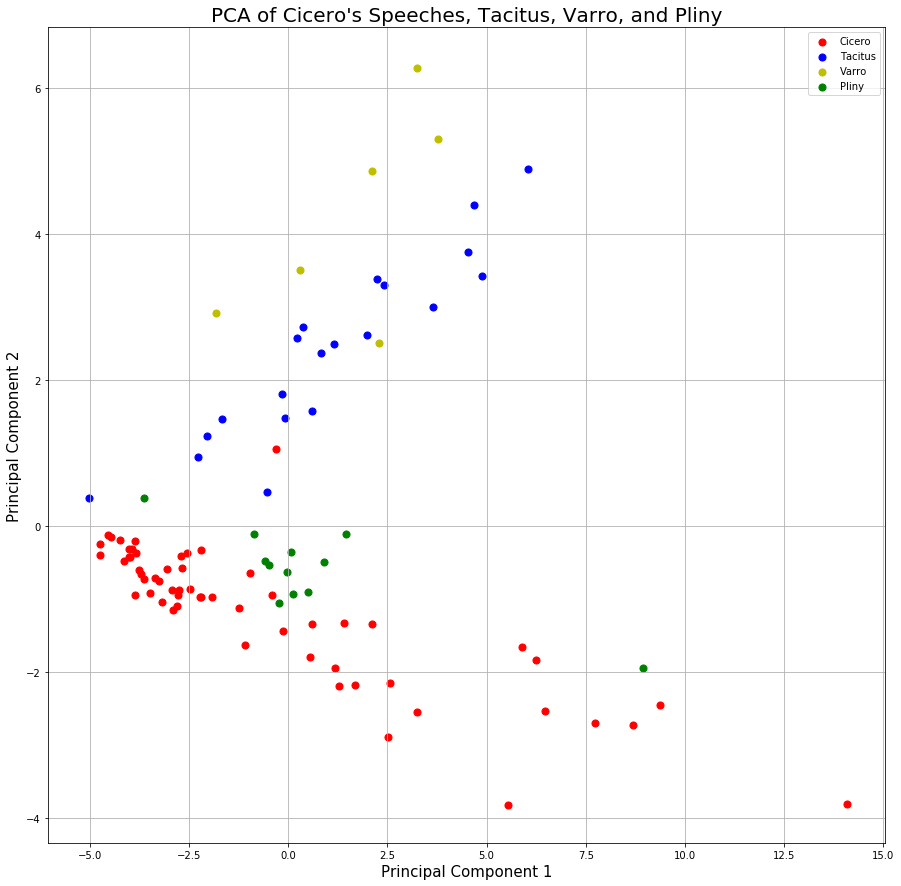

In [29]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA of Cicero\'s Speeches, Tacitus, Varro, and Pliny', fontsize = 20)

cicero_speeches = pca_2d_df.loc[pca_2d_df['author'] == 'cicero']
varro = pca_2d_df.loc[pca_2d_df['author'] == 'varro']
tacitus = pca_2d_df.loc[pca_2d_df['author'] == 'tacitus']
pliny = pca_2d_df.loc[pca_2d_df['author'] == 'pliny']

ax.scatter(x=cicero_speeches['Component 1'], y=cicero_speeches['Component 2'], c = 'r', s = 50)
ax.scatter(x=tacitus['Component 1'], y=tacitus['Component 2'], c = 'b', s = 50)
ax.scatter(x=varro['Component 1'], y=varro['Component 2'], c = 'y', s = 50)
ax.scatter(x=pliny['Component 1'], y=pliny['Component 2'], c = 'g', s = 50)

ax.legend(['Cicero', 'Tacitus', 'Varro', 'Pliny'])
ax.grid()
plt.show()

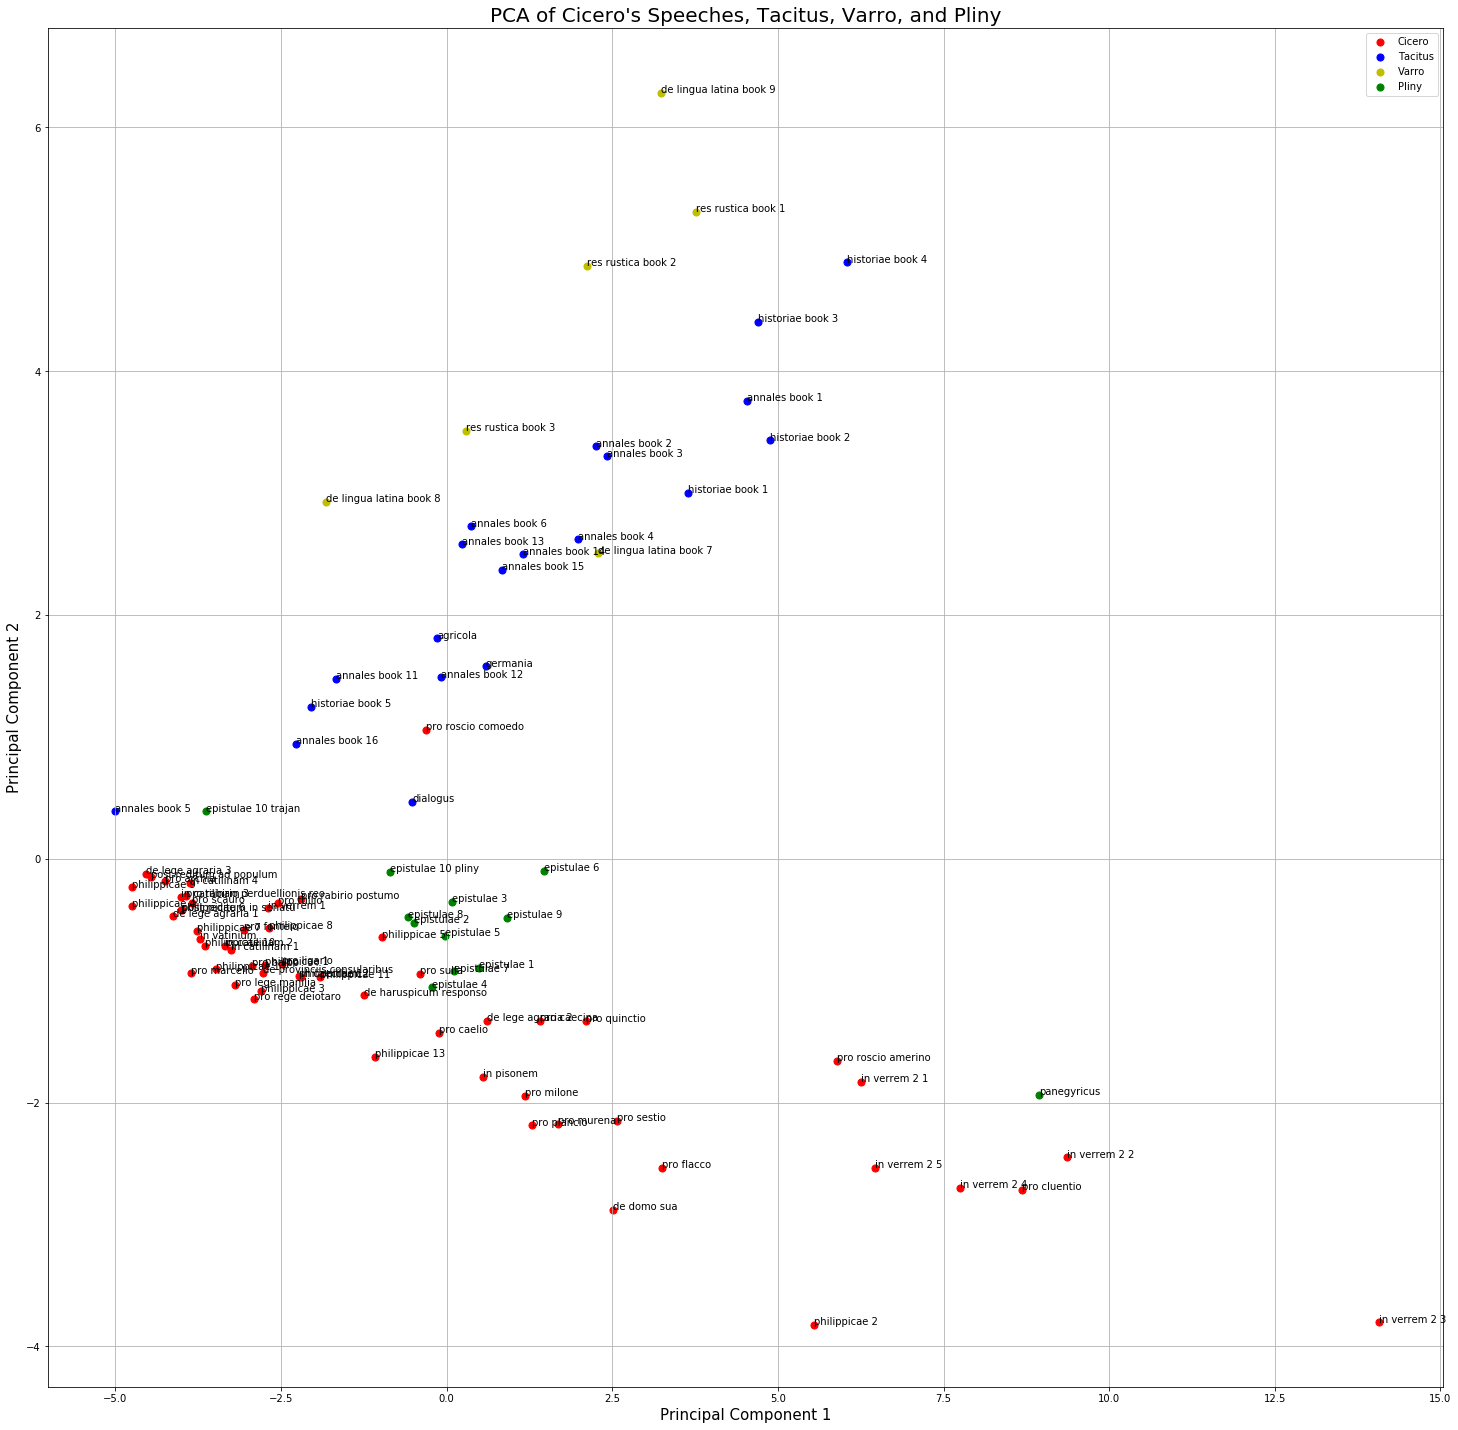

In [30]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA of Cicero\'s Speeches, Tacitus, Varro, and Pliny', fontsize = 20)

cicero_speeches = pca_2d_df.loc[pca_2d_df['author'] == 'cicero']
varro = pca_2d_df.loc[pca_2d_df['author'] == 'varro']
tacitus = pca_2d_df.loc[pca_2d_df['author'] == 'tacitus']
pliny = pca_2d_df.loc[pca_2d_df['author'] == 'pliny']

ax.scatter(x=cicero_speeches['Component 1'], y=cicero_speeches['Component 2'], c = 'r', s = 50)
ax.scatter(x=tacitus['Component 1'], y=tacitus['Component 2'], c = 'b', s = 50)
ax.scatter(x=varro['Component 1'], y=varro['Component 2'], c = 'y', s = 50)
ax.scatter(x=pliny['Component 1'], y=pliny['Component 2'], c = 'g', s = 50)

for i in range(pca_2d_df.shape[0]):
    ax.annotate(pca_2d_df['title'][i], (pca_2d_df['Component 1'][i], pca_2d_df['Component 2'][i]))

ax.legend(['Cicero', 'Tacitus', 'Varro', 'Pliny'])
ax.grid()
plt.show()

2d TSNE
===

Out of all of the visualizations here, 2d TSNE is the most promising. Take a look at how the Pliny texts cluster. Book 10 of his letters is outside of the cluster for the rest of the books. So is the Panygericus.

Here are some resources on TSNE:

https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

https://lvdmaaten.github.io/tsne/

In [31]:
tsne_2d = TSNE(n_components=2)
tsne_2d_components = tsne_2d.fit_transform(X)
tsne_2d_df = pd.DataFrame(data=tsne_2d_components, columns=['Component 1', 'Component 2'])
tsne_2d_df['title'] = works['title'].values
tsne_2d_df['author'] = works['author'].values
tsne_2d_df.head()

,Component 1,Component 2,title,author
0,2.360420,2.853070,de domo sua,cicero
1,-0.287675,0.937580,de haruspicum responso,cicero
2,-2.515947,-3.147440,de lege agraria 1,cicero
3,0.596043,2.651669,de lege agraria 2,cicero
4,-2.865156,-3.409265,de lege agraria 3,cicero


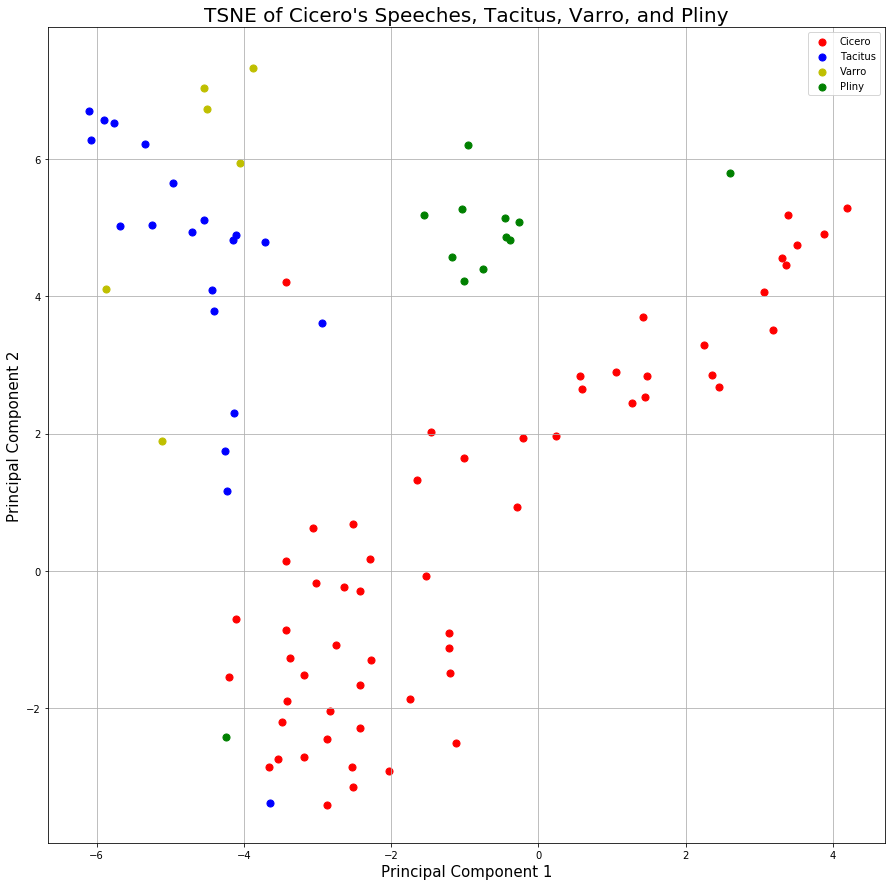

In [34]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('TSNE of Cicero\'s Speeches, Tacitus, Varro, and Pliny', fontsize = 20)

cicero_speeches = tsne_2d_df.loc[pca_2d_df['author'] == 'cicero']
varro = tsne_2d_df.loc[pca_2d_df['author'] == 'varro']
tacitus = tsne_2d_df.loc[pca_2d_df['author'] == 'tacitus']
pliny = tsne_2d_df.loc[pca_2d_df['author'] == 'pliny']

ax.scatter(x=cicero_speeches['Component 1'], y=cicero_speeches['Component 2'], c = 'r', s = 50)
ax.scatter(x=tacitus['Component 1'], y=tacitus['Component 2'], c = 'b', s = 50)
ax.scatter(x=varro['Component 1'], y=varro['Component 2'], c = 'y', s = 50)
ax.scatter(x=pliny['Component 1'], y=pliny['Component 2'], c = 'g', s = 50)

ax.legend(['Cicero', 'Tacitus', 'Varro', 'Pliny'])
ax.grid()
plt.show()
fig.savefig('tsne_2d_all_authors.png')

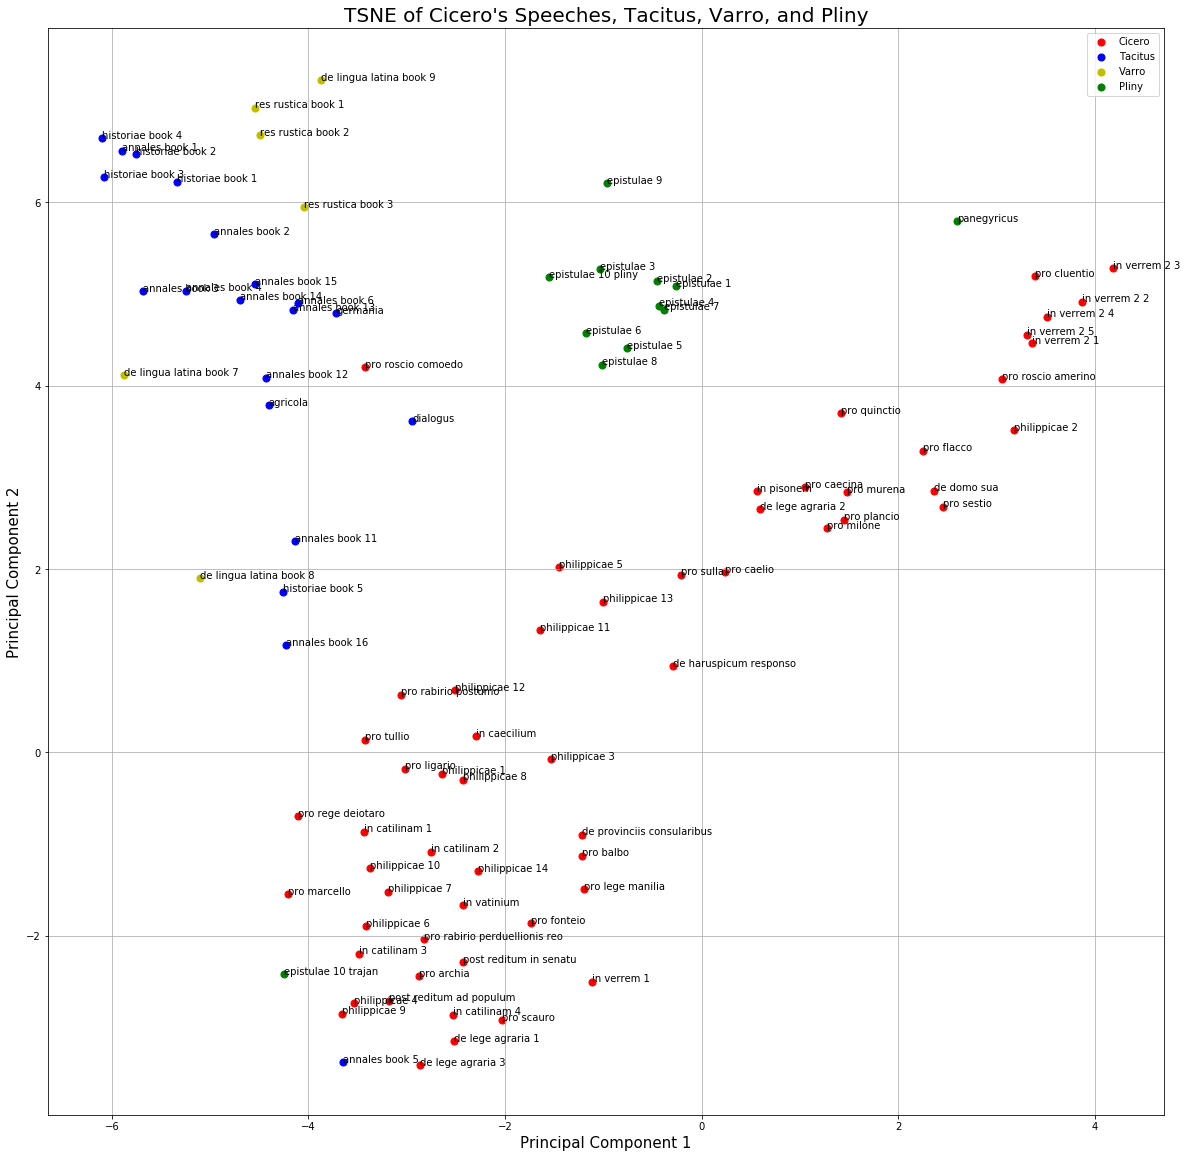

In [36]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('TSNE of Cicero\'s Speeches, Tacitus, Varro, and Pliny', fontsize = 20)

cicero_speeches = tsne_2d_df.loc[pca_2d_df['author'] == 'cicero']
varro = tsne_2d_df.loc[pca_2d_df['author'] == 'varro']
tacitus = tsne_2d_df.loc[pca_2d_df['author'] == 'tacitus']
pliny = tsne_2d_df.loc[pca_2d_df['author'] == 'pliny']

ax.scatter(x=cicero_speeches['Component 1'], y=cicero_speeches['Component 2'], c = 'r', s = 50)
ax.scatter(x=tacitus['Component 1'], y=tacitus['Component 2'], c = 'b', s = 50)
ax.scatter(x=varro['Component 1'], y=varro['Component 2'], c = 'y', s = 50)
ax.scatter(x=pliny['Component 1'], y=pliny['Component 2'], c = 'g', s = 50)

for i in range(pca_2d_df.shape[0]):
    ax.annotate(tsne_2d_df['title'][i], (tsne_2d_df['Component 1'][i], tsne_2d_df['Component 2'][i]))

ax.legend(['Cicero', 'Tacitus', 'Varro', 'Pliny'])
ax.grid()
plt.show()
fig.savefig('tsne_2d_all_authors_titles.png')

3D PCA and TSNE
===

In [ ]:
pca_3d = PCA(n_components=3)
pca_3d_components = pca_3d.fit_transform(X)
pca_3d_df = pd.DataFrame(data=pca_3d_components, columns=['Component 1', 'Component 2', 'Component 3'])
pca_3d_df['title'] = works['title'].values
pca_3d_df['author'] = works['author'].values
pca_3d_df.head()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3D PCA of Cicero\'s Speeches, Tacitus, Varro, and Pliny', fontsize = 20)

cicero_speeches = pca_3d_df.loc[pca_2d_df['author'] == 'cicero']
varro = pca_3d_df.loc[pca_2d_df['author'] == 'varro']
tacitus = pca_3d_df.loc[pca_2d_df['author'] == 'tacitus']
pliny = pca_3d_df.loc[pca_2d_df['author'] == 'pliny']

ax.scatter(xs=cicero_speeches['Component 1'], ys=cicero_speeches['Component 2'], zs=cicero_speeches['Component 3'], c='r')
ax.scatter(xs=tacitus['Component 1'], ys=tacitus['Component 2'], zs=tacitus['Component 3'], c='b')
ax.scatter(xs=varro['Component 1'], ys=varro['Component 2'], zs=varro['Component 3'], c='y')
ax.scatter(xs=pliny['Component 1'], ys=pliny['Component 2'], zs=pliny['Component 3'], c='g')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3D PCA of Cicero\'s Speeches, Tacitus, Varro, and Pliny', fontsize = 20)

cicero_speeches = pca_3d_df.loc[pca_2d_df['author'] == 'cicero']
varro = pca_3d_df.loc[pca_2d_df['author'] == 'varro']
tacitus = pca_3d_df.loc[pca_2d_df['author'] == 'tacitus']
pliny = pca_3d_df.loc[pca_2d_df['author'] == 'pliny']

ax.scatter(xs=cicero_speeches['Component 1'], ys=cicero_speeches['Component 2'], zs=cicero_speeches['Component 3'], c='r')
ax.scatter(xs=tacitus['Component 1'], ys=tacitus['Component 2'], zs=tacitus['Component 3'], c='b')
ax.scatter(xs=varro['Component 1'], ys=varro['Component 2'], zs=varro['Component 3'], c='y')
ax.scatter(xs=pliny['Component 1'], ys=pliny['Component 2'], zs=pliny['Component 3'], c='g')

for i in range(pca_2d_df.shape[0]):
    ax.text(pca_3d_df['Component 1'][i], pca_3d_df['Component 2'][i], pca_3d_df['Component 3'][i], pca_3d_df['title'][i])

In [ ]:
tsne_3d = TSNE(n_components=3, perplexity=10)
tsne_3d_components = tsne_3d.fit_transform(X)
tsne_3d_df = pd.DataFrame(data=tsne_3d_components, columns=['Component 1', 'Component 2', 'Component 3'])
tsne_3d_df['title'] = works['title'].values
tsne_3d_df['author'] = works['author'].values
tsne_3d_df.head()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3D TSNE of Cicero\'s Speeches, Tacitus, Varro, and Pliny', fontsize = 20)

cicero_speeches = tsne_3d_df.loc[tsne_3d_df['author'] == 'cicero']
varro = tsne_3d_df.loc[tsne_3d_df['author'] == 'varro']
tacitus = tsne_3d_df.loc[tsne_3d_df['author'] == 'tacitus']
pliny = tsne_3d_df.loc[tsne_3d_df['author'] == 'pliny']

ax.scatter(xs=cicero_speeches['Component 1'], ys=cicero_speeches['Component 2'], zs=cicero_speeches['Component 3'], c='r')
ax.scatter(xs=tacitus['Component 1'], ys=tacitus['Component 2'], zs=tacitus['Component 3'], c='b')
ax.scatter(xs=varro['Component 1'], ys=varro['Component 2'], zs=varro['Component 3'], c='y')
ax.scatter(xs=pliny['Component 1'], ys=pliny['Component 2'], zs=pliny['Component 3'], c='g')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3D TSNE of Cicero\'s Speeches, Tacitus, Varro, and Pliny', fontsize = 20)

cicero_speeches = tsne_3d_df.loc[tsne_3d_df['author'] == 'cicero']
varro = tsne_3d_df.loc[tsne_3d_df['author'] == 'varro']
tacitus = tsne_3d_df.loc[tsne_3d_df['author'] == 'tacitus']
pliny = tsne_3d_df.loc[tsne_3d_df['author'] == 'pliny']

ax.scatter(xs=cicero_speeches['Component 1'], ys=cicero_speeches['Component 2'], zs=cicero_speeches['Component 3'], c='r')
ax.scatter(xs=tacitus['Component 1'], ys=tacitus['Component 2'], zs=tacitus['Component 3'], c='b')
ax.scatter(xs=varro['Component 1'], ys=varro['Component 2'], zs=varro['Component 3'], c='y')
ax.scatter(xs=pliny['Component 1'], ys=pliny['Component 2'], zs=pliny['Component 3'], c='g')

for i in range(tsne_3d_df.shape[0]):
    ax.text(tsne_3d_df['Component 1'][i], tsne_3d_df['Component 2'][i], tsne_3d_df['Component 3'][i], tsne_3d_df['title'][i])